## Import libraries

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

## Path

In [14]:
dataset= "C:/Users/Asus/Downloads/CVPR ASSIGNMENT/archive/animals"

## Images Category

In [15]:
print(os.listdir(dataset))

['animals', 'cats', 'dogs', 'images', 'panda']


In [16]:
dataset = os.path.join(dataset, "animals")
print(os.listdir(dataset))

['cats', 'dogs', 'panda']


In [17]:
categories = os.listdir(dataset)
print(categories)

['cats', 'dogs', 'panda']


In [18]:
print ([os.listdir(os.path.join(dataset, category)) for category in categories])

[['cats_00001.jpg', 'cats_00002.jpg', 'cats_00003.jpg', 'cats_00004.jpg', 'cats_00005.jpg', 'cats_00006.jpg', 'cats_00007.jpg', 'cats_00008.jpg', 'cats_00009.jpg', 'cats_00010.jpg', 'cats_00011.jpg', 'cats_00012.jpg', 'cats_00013.jpg', 'cats_00014.jpg', 'cats_00015.jpg', 'cats_00016.jpg', 'cats_00017.jpg', 'cats_00018.jpg', 'cats_00019.jpg', 'cats_00020.jpg', 'cats_00021.jpg', 'cats_00022.jpg', 'cats_00023.jpg', 'cats_00024.jpg', 'cats_00025.jpg', 'cats_00026.jpg', 'cats_00027.jpg', 'cats_00028.jpg', 'cats_00029.jpg', 'cats_00030.jpg', 'cats_00031.jpg', 'cats_00032.jpg', 'cats_00033.jpg', 'cats_00034.jpg', 'cats_00035.jpg', 'cats_00036.jpg', 'cats_00037.jpg', 'cats_00038.jpg', 'cats_00039.jpg', 'cats_00040.jpg', 'cats_00041.jpg', 'cats_00042.jpg', 'cats_00043.jpg', 'cats_00044.jpg', 'cats_00045.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00048.jpg', 'cats_00049.jpg', 'cats_00050.jpg', 'cats_00051.jpg', 'cats_00052.jpg', 'cats_00053.jpg', 'cats_00054.jpg', 'cats_00055.jpg', 'cats_00

## Train Images

In [22]:
import random

train_data = []

for index, category in enumerate(categories):
    label = index
    path = os.path.join(dataset, category)
    images = os.listdir(path)
    random.shuffle(images)

    for img in images[:100]:
        img_path = os.path.join(path, img)
        img_bgr = cv2.imread(img_path)
        img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
        img_gray = cv2.resize(img_gray, (100, 100))
        train_data.append([img_gray, label])


The program prepares the training dataset using images from three categories: **dogs**, **cats**, and **pandas**. It initializes an empty list called `train_data` to store processed images along with their labels.

For each category:
  * It constructs the file path to the category folder. Retrieves the list of image files.
  * **Shuffles** the image list to ensure randomness.
  * Selects the **first 100 images** from the shuffled list.

For each of the selected 100 images:
  * The image is **read** using OpenCV. It is **converted to grayscale** to remove color information.
  * The image is **resized to 100x100 pixels** for consistency. The processed image is paired with its corresponding **label** (based on category).
  * This pair is appended to the `train_data` list.

After processing all categories, the final training data contains **300 grayscale images** (100 from each category), ready for training a machine learning model.

In [23]:
np.random.shuffle(train_data)
print ([train_data[i][1] for i in range(10)])

[1, 1, 0, 2, 0, 0, 0, 0, 2, 1]


## Show the Images

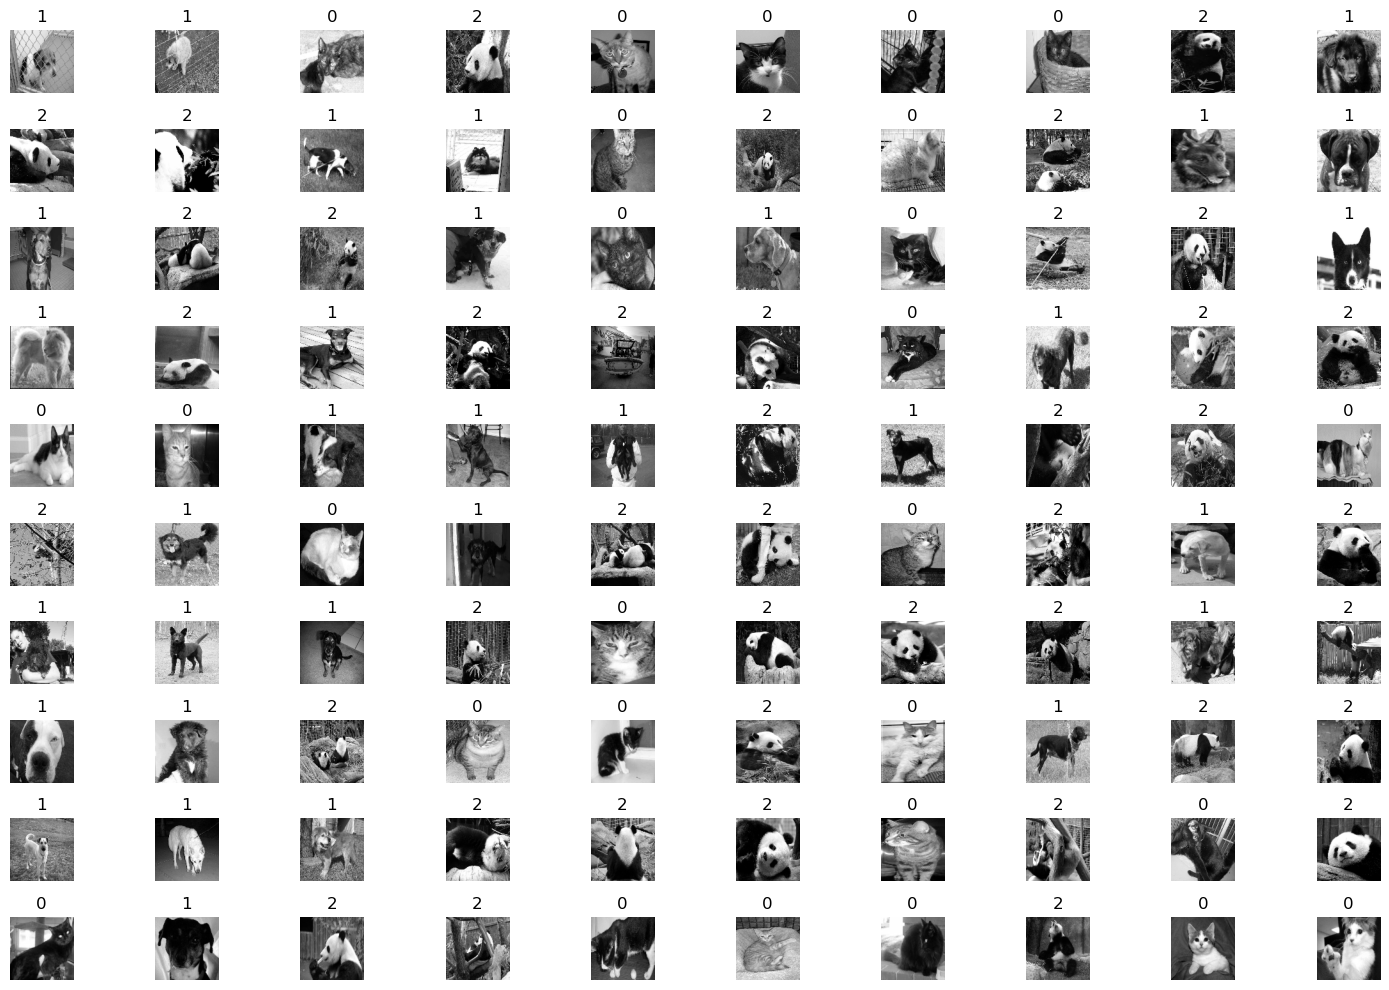

In [32]:
fig, axes = plt.subplots(10, 10, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img_array, label = train_data[i]
    ax.imshow(img_array, cmap="gray")
    ax.set_title(label)
    ax.axis('off')

plt.tight_layout()
plt.show()


Uses **Matplotlib** to display a **3×3 grid** of grayscale animal images.
* Each image is taken from `train_data`, which contains both the image and its label.
* **Labels** represent animal types: `0 = dog`, `1 = cat`, `2 = panda`.
* The code sets the **title of each subplot** to show the corresponding label.
* Helps **visualize how images are distributed** across different animal classes.
* Useful for **understanding model input** and verifying correct labeling. 

In [33]:
#the train_data is being divided into 5 folds for cross-validation
folds = []
for i in range(5):
    folds.append(train_data[i::5])

len(folds)


5

In [34]:
# Iterate through each fold, extract labels, and print the fold number and its labels
for fold_index in range(len(folds)):
    fold = folds[fold_index]  # Get the current fold
    labels = [label for _, label in fold]  # Extract labels from the fold
    print(f"Fold {fold_index + 1}:")  # Print the current fold number
    print(f"Labels: {labels}")  # Print the labels of the current fold


Fold 1:
Labels: [1, 0, 2, 2, 1, 1, 1, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1]
Fold 2:
Labels: [1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 2, 0, 1, 2, 0, 0]
Fold 3:
Labels: [0, 0, 1, 2, 2, 2, 1, 1, 1, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]
Fold 4:
Labels: [2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 1, 1, 0, 2, 0, 2, 2, 1, 2, 1, 2, 1, 0, 0, 1, 2, 2, 1, 0, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0]
Fold 5:
Labels: [0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 1, 0, 2, 2, 2, 1, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 1, 2, 0, 0]


In [38]:
def l2_distance(valid_img, train_img):
    
    # Calculate the element-wise difference between the two images
    difference = valid_img - train_img

    # Square each of the differences to eliminate negative signs
    squared_difference = np.square(difference)

    # Sum up all the squared differences to get a total
    summed_squares = np.sum(squared_difference)

    # Take the square root of the sum of squared differences to compute the Euclidean distance
    distance = np.sqrt(summed_squares)

    # Return the Euclidean distance
    return distance

def l1_distance(valid_img, train_img):
    # Calculate the element-wise absolute difference between the two images
    difference = np.abs(valid_img - train_img)

    # Sum up all the absolute differences to get the Manhattan distance
    distance = np.sum(difference)

    # Return the Manhattan distance
    return distance

In [43]:
from collections import Counter  # Importing the Counter class to count the occurrences of labels

def knn_prediction(distances, k=1):
    # Get the k nearest neighbors based on the provided distances
    nearest_neighbors = distances[:k]

    # Extract the labels of the nearest neighbors
    labels = [label for _, label in nearest_neighbors]

    # Count the occurrences of each label using Counter
    label_counts = Counter(labels)

    # Get the most common label (the one that appears most frequently among the nearest neighbors)
    most_common_label = label_counts.most_common(1)[0][0]

    # Return the most common label as the predicted label
    return most_common_label

#### Accuracy calculate

In [55]:
fold_accuracies_2 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_2 = []  # List to store average accuracy for each value of k

# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 6):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L2 distances between the validation image and all training images
            l2_distances = [
                (l2_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l2_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l2_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_2.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_2.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")



K = 1:
  Average Accuracy: 0.42

K = 2:
  Average Accuracy: 0.42

K = 3:
  Average Accuracy: 0.40

K = 4:
  Average Accuracy: 0.42

K = 5:
  Average Accuracy: 0.42


In [56]:
fold_accuracies_1 = []  # List to store accuracies for each fold and each value of k
avg_accuracies_1 = []  # List to store average accuracy for each value of k
# Loop through different values of k (1 to 30 for k-NN)
for k in range(1, 6):
    accuracies = []  # List to store accuracy for each fold for a particular value of k

    # Loop over each fold for cross-validation (leave-one-out fold)
    for i in range(len(folds) - 1, -1, -1):
        valid_set = folds[i]  # Select the validation set (current fold)

        # Create the training set by combining all folds except the current validation fold
        train_set = [
            item for j, fold in enumerate(folds) if j != i for item in fold
        ]

        predictions = []  # List to store the prediction results for the current fold

        # Loop through each image in the validation set
        for valid_img in valid_set:
            # Calculate L1 distances between the validation image and all training images
            l1_distances = [
                (l1_distance(valid_img[0], train_img[0]), train_img[1])
                for train_img in train_set
            ]
            l1_distances.sort()  # Sort the distances in ascending order

            # Use the k-NN prediction function to get the predicted label for the validation image
            predicted_label = knn_prediction(l1_distances, k)
            # Check if the predicted label matches the true label of the validation image
            predictions.append(1 if predicted_label == valid_img[1] else 0)

        # Calculate the accuracy for this fold (percentage of correct predictions)
        fold_accuracy = sum(predictions) / len(predictions)
        accuracies.append(fold_accuracy)

    # Store the accuracies for all folds for the current value of k
    fold_accuracies_1.append(accuracies)
    # Calculate the average accuracy for the current value of k across all folds
    avg_accuracy = sum(accuracies) / len(accuracies)
    avg_accuracies_1.append(avg_accuracy)

    # Print the results for the current value of k
    print(f"\nK = {k}:")
    print(f"  Average Accuracy: {avg_accuracy:.2f}")


K = 1:
  Average Accuracy: 0.36

K = 2:
  Average Accuracy: 0.36

K = 3:
  Average Accuracy: 0.41

K = 4:
  Average Accuracy: 0.41

K = 5:
  Average Accuracy: 0.41


## Show the graph

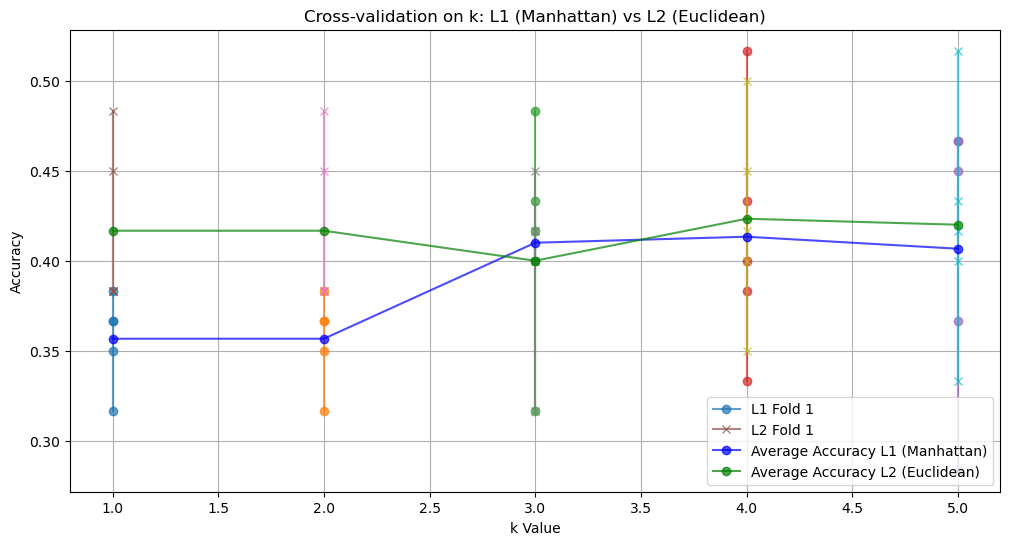

In [57]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Assuming fold_accuracies_l1 and fold_accuracies_l2 store accuracies for L1 and L2 distances respectively
# And avg_accuracies_l1 and avg_accuracies_l2 store the average accuracies for L1 and L2 distances

colors = plt.cm.tab10.colors

# Loop to plot individual fold accuracies for both L1 (Manhattan) and L2 (Euclidean)
for k in range(5):
    # Plot L1 (Manhattan) fold accuracies
    fold_accuracy_l1 = fold_accuracies_1[k]
    plt.plot([k + 1] * len(fold_accuracy_l1), fold_accuracy_l1, linestyle='-', marker='o', alpha=0.7, color=colors[k % len(colors)], label=f'L1 Fold {k+1}' if k == 0 else "")

    # Plot L2 (Euclidean) fold accuracies
    fold_accuracy_l2 = fold_accuracies_2[k]
    plt.plot([k + 1] * len(fold_accuracy_l2), fold_accuracy_l2, linestyle='-', marker='x', alpha=0.7, color=colors[(k+5) % len(colors)], label=f'L2 Fold {k+1}' if k == 0 else "")

# Plot average accuracies for L1 and L2 distances
plt.plot(range(1, 6), avg_accuracies_1, color='blue', alpha=0.7, label='Average Accuracy L1 (Manhattan)', linestyle='-', marker='o')
plt.plot(range(1, 6), avg_accuracies_2, color='green', alpha=0.7, label='Average Accuracy L2 (Euclidean)', linestyle='-', marker='o')

# Labels and title
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Cross-validation on k: L1 (Manhattan) vs L2 (Euclidean)')

# Show grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.show()


### **Graph Discussion: Manhattan (L1) vs Euclidean (L2) Distance Metrics**

* **Fluctuating Performance:**

  * Both L1 and L2 distances show noticeable variation in individual fold accuracies.
  * This suggests that model performance is somewhat inconsistent across different validation splits.

* **Optimal *k* Values:**

  * For **L1**, average accuracy peaks around *k = 3 to 4*.
  * For **L2**, performance is relatively stable, with slightly higher average accuracy at *k = 4*.
  * Choosing *k = 4* seems reasonable for both metrics based on current trends.

* **Model Stability:**

  * Euclidean (L2) distance appears **more stable** than Manhattan (L1), as its average line fluctuates less.
  * L2 also shows less deviation among the folds, especially around *k = 3 and 4*.

* **Variation Across 5 Folds:**

  * There's a wide spread of accuracy scores at each *k* value, particularly with L1.
  * Some folds perform significantly better or worse, hinting at the sensitivity of the model to training/test splits.

* **Choosing the Right Distance Metric:**

  * Although both distances have close average performance, **L2 (Euclidean)** offers slightly better consistency and average results.
  * Given that the dataset contains grayscale image features (pixel intensities), L2 is often more suited due to its ability to capture global distances more accurately.

* **Limitations & Improvements:**

  * Accuracy is relatively low (mostly under 45%), so better feature extraction or preprocessing (edge detection, dimensionality reduction) could help.
  * Also, more advanced models (CNN, SVM) might outperform basic k-NN in image classification tasks.

## Display Top 5 Predictions from test data using k-NN

In [49]:
# Assuming train_data is your prepared list of (image, label) pairs
X = np.array([item[0].flatten() for item in train_data])  # Flatten 100x100 grayscale images to 1D
y = np.array([item[1] for item in train_data])

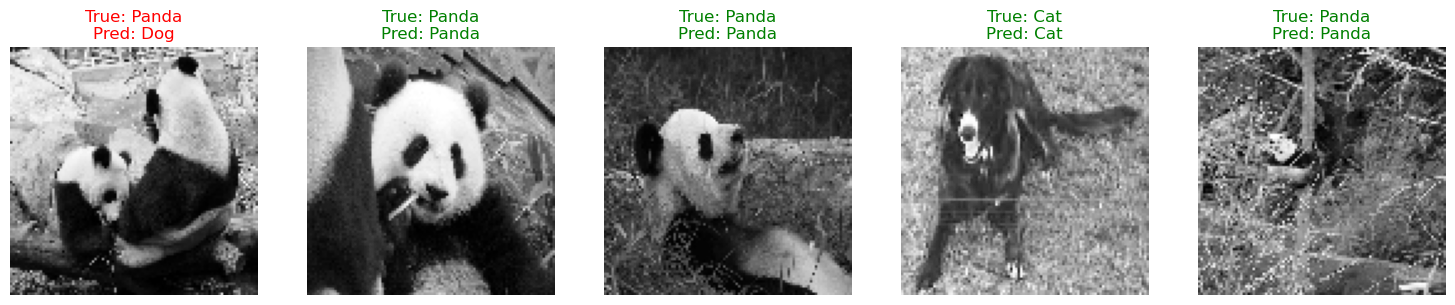

In [53]:
# Display Top 5 Predictions from test data using k-NN
def display_top_5_predictions(X, y, k, distance_metric):
    # Randomly choose 5 indices
    indices = np.random.choice(len(X), 5, replace=False)

    # Create training and testing split (80/20)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Label mapping
    label_map = {0: "Dog", 1: "Cat", 2: "Panda"}

    # Display predictions
    plt.figure(figsize=(15, 3))
    for i, idx in enumerate(indices):
        image = X[idx].reshape(100, 100)
        true_label = y[idx]

        # Predict using k-NN
        distances = []
        for j in range(len(X_train)):
            if distance_metric == 'euclidean':
                dist = np.sqrt(np.sum((X_train[j] - X[idx])**2))
            else:
                dist = np.sum(np.abs(X_train[j] - X[idx]))
            distances.append((dist, y_train[j]))

        distances.sort(key=lambda x: x[0])
        top_k = [label for _, label in distances[:k]]
        from collections import Counter
        prediction = Counter(top_k).most_common(1)[0][0]

        # Plot
        plt.subplot(1, 5, i+1)
        plt.imshow(image, cmap='gray')
        plt.title(f"True: {label_map[true_label]}\nPred: {label_map[prediction]}", 
                  color='green' if prediction == true_label else 'red')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function (k=3, distance='euclidean' or 'manhattan')
display_top_5_predictions(X, y, k=3, distance_metric='euclidean')
